In [1]:
#==================================================================
#Program: spectrumVisualizer
#Author(s): David Helminiak
#Date Created: September 2019
#Date Last Modified: December 2019
#Changelog: 0.1  - Visualization of samples direct from thermo .RAW files
#           0.2  - Correction to match better with msi quickview
#           0.3  - Added averaging code as default output option
#
#==================================================================

#==================================================================
#LIBRARY IMPORTS
#==================================================================
import numpy as np
import matplotlib.pyplot as plt
import glob
import math
import multiprocessing
import natsort
import os
import re
import shutil
import sys
import time
from joblib import Parallel, delayed
from PIL import Image
from IPython.core.debugger import Tracer
from thermoRawReader import thermoRAW_spectra
from tqdm.auto import tqdm
#==================================================================

#MAIN PROGRAM
#==================================================================

mzArrays = []

#81 uterine
mzRanges = [
     [412.5935, 412.6101], [454.874, 454.8922], [454.8844, 454.9026], [504.0148, 504.035], 
     [504.0269, 504.0471], [505.2008, 505.221], [518.3126, 518.3334], [534.2863, 534.3077], 
     [542.3123, 542.3339], [544.3277, 544.3495], [546.3435, 546.3653], [562.3172, 562.3396], 
     [569.3538, 569.3766], [576.3327, 576.3557], [611.1321, 611.1565], [613.7524, 613.777], 
     [615.4853, 615.5099], [617.501, 617.5258], [629.5815, 629.6067], [629.5972, 629.6224], 
     [631.4592, 631.4844], [633.4749, 633.5003], [639.485, 639.5106], [641.5007, 641.5263], 
     [643.5164, 643.5422], [655.4589, 655.4851], [657.4745, 657.5007], [659.4902, 659.5166], 
     [710.7395, 710.7679], [710.7586, 710.787], [725.5445, 725.5735], [728.5076, 728.5368], 
     [741.5183, 741.5479], [754.5229, 754.5531], [756.5384, 756.5686], [758.5527, 758.5831], 
     [760.5724, 760.6028], [768.5752, 768.606], [770.4966, 770.5274], [772.5123, 772.5433], 
     [780.5381, 780.5693], [782.695, 782.7264], [782.5539, 782.5853], [784.5587, 784.5901], 
     [784.5698, 784.6012], [786.5876, 786.619], [790.5587, 790.5903], [796.5119, 796.5437], 
     [798.5276, 798.5596], [802.5216, 802.5538], [804.5377, 804.5699], [806.5541, 806.5863], 
     [808.5691, 808.6015], [808.6845, 808.7169], [810.5858, 810.6182], [812.4946, 812.5272], 
     [816.5741, 816.6067], [818.5902, 818.623], [820.5114, 820.5442], [822.5278, 822.5608], 
     [824.5428, 824.5758], [826.5593, 826.5923], [828.5373, 828.5705], [830.553, 830.5862], 
     [832.5686, 832.602], [834.5859, 834.6193], [835.6523, 835.6857], [844.5109, 844.5447], 
     [846.5271, 846.5609], [848.5424, 848.5764], [850.5591, 850.5931], [856.5685, 856.6027], 
     [858.5849, 858.6193], [869.685, 869.7198], [893.6846, 893.7204], [897.7168, 897.7528], 
     [898.1341, 898.1701], [919.7003, 919.7371], [921.716, 921.7528], [923.7316, 923.7686], 
     [928.3363, 928.3735]
]
mzArrays.append(mzRanges)

#86 uterine
mzRanges = [
    [136.0455, 136.0509], [154.0557, 154.0619], [170.0293, 170.0361], [280.0863, 280.0975], 
    [296.06, 296.0718], [412.5935, 412.6101], [454.874, 454.8922], [454.8844, 454.9026], 
    [504.0148, 504.035], [504.0269, 504.0471], [505.2008, 505.221], [518.3126, 518.3334], 
    [534.2863, 534.3077], [542.3123, 542.3339], [544.3277, 544.3495], [546.3435, 546.3653], 
    [562.3172, 562.3396], [569.3538, 569.3766], [576.3327, 576.3557], [611.1321, 611.1565], 
    [613.7524, 613.777], [615.4853, 615.5099], [617.501, 617.5258], [629.5815, 629.6067], 
    [629.5972, 629.6224], [631.4592, 631.4844], [633.4749, 633.5003], [639.485, 639.5106], 
    [641.5007, 641.5263], [643.5164, 643.5422], [655.4589, 655.4851], [657.4745, 657.5007], 
    [659.4902, 659.5166], [710.7395, 710.7679], [710.7586, 710.787], [725.5445, 725.5735], 
    [728.5076, 728.5368], [741.5183, 741.5479], [754.5229, 754.5531], [756.5384, 756.5686], 
    [758.5527, 758.5831], [760.5724, 760.6028], [768.5752, 768.606], [770.4966, 770.5274], 
    [772.5123, 772.5433], [780.5381, 780.5693], [782.5539, 782.5853], [782.695, 782.7264], 
    [784.5587, 784.5901], [784.5698, 784.6012], [786.5876, 786.619], [790.5587, 790.5903], 
    [796.5119, 796.5437], [798.5276, 798.5596], [802.5216, 802.5538], [804.5377, 804.5699], 
    [806.5541, 806.5863], [808.5691, 808.6015], [808.6845, 808.7169], [810.5858, 810.6182], 
    [812.4946, 812.5272], [816.5741, 816.6067], [818.5902, 818.623], [820.5114, 820.5442], 
    [822.5278, 822.5608], [824.5428, 824.5758], [826.5593, 826.5923], [828.5373, 828.5705], 
    [830.553, 830.5862], [832.5686, 832.602], [834.5859, 834.6193], [835.6523, 835.6857], 
    [844.5109, 844.5447], [846.5271, 846.5609], [848.5424, 848.5764], [850.5591, 850.5931], 
    [856.5685, 856.6027], [858.5849, 858.6193], [869.685, 869.7198], [893.6846, 893.7204], 
    [897.7168, 897.7528], [898.1341, 898.1701], [919.7003, 919.7371], [921.716, 921.7528], 
    [923.7316, 923.7686], [928.3363, 928.3735]
]
mzArrays.append(mzRanges)

#87 uterine
mzRanges = [
    [124.0041, 124.0091], [128.032, 128.0372], [130.0589, 130.0641], [130.084, 130.0892],
    [132.0268, 132.032], [135.0277, 135.0331], [140.0082, 140.0138], [145.0582, 145.064], 
    [146.0422, 146.048], [171.002, 171.0088], [171.0984, 171.1052], [175.0202, 175.0272], 
    [179.0516, 179.0588], [187.0929, 187.1003], [191.1755, 191.1831], [194.9797, 194.9875], 
    [199.1289, 199.1369], [211.1285, 211.1369], [214.0432, 214.0517], [215.1234, 215.1321], 
    [227.123, 227.132], [227.1595, 227.1685], [233.1486, 233.158], [235.1644, 235.1739], 
    [239.1591, 239.1687], [243.0558, 243.0656], [253.2109, 253.2211], [255.2264, 255.2366], 
    [256.0526, 256.0628], [257.2332, 257.2434], [259.0155, 259.0259], [267.0667, 267.0773], 
    [267.2262, 267.2368], [269.2419, 269.2526], [277.1375, 277.1485], [277.2105, 277.2215], 
    [279.153, 279.1642], [279.226, 279.2371], [281.2415, 281.2527], [281.2563, 281.2675], 
    [283.257, 283.2684], [293.2044, 293.2162], [295.2202, 295.232], [295.2568, 295.2686], 
    [297.2358, 297.2476], [301.2099, 301.2219], [303.2253, 303.2375], [305.2407, 305.2529], 
    [306.244, 306.2562], [307.2563, 307.2685], [309.2718, 309.2842], [311.287, 311.2994], 
    [317.1678, 317.1804], [319.2197, 319.2325], [321.2353, 321.2481], [322.0362, 322.049], 
    [323.0202, 323.0332], [323.2511, 323.2641], [327.2244, 327.2374], [329.24, 329.2532], 
    [331.2555, 331.2687], [333.2712, 333.2846], [335.2868, 335.3002], [337.3024, 337.3158], 
    [345.2346, 345.2484], [346.0467, 346.0605], [347.0309, 347.0447], [355.2554, 355.2696], 
    [357.2705, 357.2847], [359.2862, 359.3006], [362.0418, 362.0562], [365.3325, 365.3471], 
    [392.1188, 392.1344], [500.2646, 500.2846], [503.5483, 503.5685], [524.2651, 524.2861], 
    [549.2479, 549.2699], [549.248, 549.27], [552.2588, 552.2808], [552.2594, 552.2814], 
    [561.073, 561.0954], [599.3068, 599.3308], [664.4033, 664.4299], [692.4338, 692.4614], 
    [788.5251, 788.5567], [834.5101, 834.5435], [885.5276, 885.563]
]
mzArrays.append(mzRanges)

#Add mz Ranges here

def rowVisualizer_parhelper(mzRanges, maximumSpectraLength, mzValues, signalValues):
    results = []
    for mzRange in mzRanges:
        lowMZ = min(mzValues, key=lambda x:abs(x-mzRange[0]))
        highMZ = min(mzValues, key=lambda x:abs(x-mzRange[1]))
        idxs = np.where((np.asarray(mzValues) >= lowMZ) & (np.asarray(mzValues) <= highMZ))[0]
        if len(idxs) > 0:
            signalValuesShort = signalValues[min(idxs):max(idxs)]
            #Perdue version rounded the values before summation...
            #for signalNum in range(0, len(signalValuesShort)):
                #if (signalValuesShort[signalNum] % 1) == 0.5: 
                    #signalValuesShort[signalNum] = np.ceil(signalValuesShort[signalNum])
            #results.append(np.sum(np.round(signalValuesShort)))
            results.append(np.sum(signalValuesShort))
        else:
            results.append(0)
    return results


dir_ResultsAndData = '.' + os.path.sep + 'ResultsAndData' + os.path.sep
dir_InputData = dir_ResultsAndData + 'InputData' + os.path.sep
dir_Results = dir_ResultsAndData + 'Results' + os.path.sep


In [ ]:
#Set the time resolution to perform interpolation over; def: 0.001
timeRes = 0.001

#Set resultant number of pixels to interp over
numInterpCols = int(1/timeRes)

#Set the number of available CPU threads
num_threads = multiprocessing.cpu_count()-2 #Leave a couple to spare

#For each of the mz sets
for mzRanges in mzArrays:

    #For each of the samples
    dataSampleNames = []
    sortedFolders = natsort.natsorted(glob.glob(dir_InputData +str(len(mzRanges))+'/*'),reverse=False)
    for trainingSampleFolderNum in range(0,len(sortedFolders)):
        trainingSampleFolder = sortedFolders[trainingSampleFolderNum]

        dataSampleName = os.path.basename(trainingSampleFolder)
        print('Sample', dataSampleName)

        resultPath = dir_Results + dataSampleName
        if os.path.exists(resultPath): shutil.rmtree(resultPath)
        os.makedirs(resultPath)    

        dataSampleNames.append(dataSampleName)

        fileNames = natsort.natsorted(glob.glob(trainingSampleFolder + '/*.RAW'),reverse=False)

        result = Parallel(n_jobs=num_threads)(delayed(thermoRAW_spectra)(fileNames[fileNum]) for fileNum in tqdm(range(0,len(fileNames)), desc = 'RAW FILES', leave = True))

        result = np.asarray(result)

        spectraList, indexesList = result[:,0], result[:,1]

        lengths = []
        for x in range(0,len(spectraList)): lengths.append(len(spectraList[x]))
        maximumSpectraLength = max(lengths)

        #Create holding arrays for the visualizations
        mzImages = []
        for mzNum in range(0, len(mzRanges)): mzImages.append([])

        #Perform the visualizations for all of the specified mass ranges
        for rowNum in tqdm(range(0,len(spectraList)), desc = 'ROW', leave = True):
            results = Parallel(n_jobs=num_threads)(delayed(rowVisualizer_parhelper)(mzRanges, maximumSpectraLength, spectraList[rowNum][columnNum].mzValues, spectraList[rowNum][columnNum].signalValues) for columnNum in tqdm(range(0,len(spectraList[rowNum])), desc = 'COL', leave = False))
            results = np.asarray(results).T
            for mzNum in range(0, len(mzRanges)): mzImages[mzNum].append(results[mzNum])
       
        #Extract all unique measurement times for alignment
        allTimes = []
        for rowNum in range(0,len(indexesList)): allTimes.append([scanIndex.time for scanIndex in indexesList[rowNum]])
        uniqueTimes = np.unique([pxNum for row in allTimes for pxNum in row])
        newTimes = np.linspace(min(uniqueTimes), max(uniqueTimes), numInterpCols)

        #For each of the mzImages, interpolate over time-domain for row alignment
        newImages = []
        for mzImage in mzImages:
            newImage = []
            for rowNum in range(0,len(mzImage)):
                origValues = mzImage[rowNum]
                origTimes = [scanIndex.time for scanIndex in indexesList[rowNum]]
                newImage.append(np.interp(newTimes, origTimes, origValues).tolist())
            newImages.append(newImage)

        #Save each of the visualizations
        for mzNum in tqdm(range(0, len(mzRanges)), desc = 'SAVE', leave = True):
            np.savetxt(resultPath + '/mz' + ('%.4f' % mzRanges[mzNum][0]) + '_' + ('%.4f' % mzRanges[mzNum][1]) + 'fn' + dataSampleName + 'ns' + str(len(spectraList)) + '.csv', newImages[mzNum], delimiter=",")
            plt.imshow(np.asarray(newImages[mzNum]), aspect='auto', cmap = 'hot')
            plt.savefig(resultPath + '/mz' + ('%.4f' % mzRanges[mzNum][0]) + '_' + ('%.4f' % mzRanges[mzNum][1]) + 'fn' + dataSampleName + 'ns' + str(len(spectraList)) + '.png')
            plt.close()

        mzWeights = np.ones(len(newImages))/len(newImages)
        avgImage = np.average(np.asarray(newImages), axis=0, weights=mzWeights)
        plt.imshow(avgImage, cmap='hot')
        plt.savefig(resultPath +'/'+ dataSampleName + '_avg_origAspect.png')
        plt.imshow(avgImage,cmap='hot',aspect='auto')
        plt.savefig(resultPath +'/'+ dataSampleName + '_avg_autoAspect.png')
        
        #Plot mosaic here
        

In [ ]:
import cv2
#compute the Laplacian of the image and then return the focus measure, which is simply the variance of the Laplacian
cv2.Laplacian(mzImages[10], cv2.CV_64F).var()

In [ ]:
#Pancreatic mz Ranges
# mzRanges = [
#       [516.2963, 516.3169],
#       [518.3119, 518.3326],
#       [540.2958, 540.3174],
#       [542.3114, 542.3331],
#       [544.327, 544.3488],
#       [546.3426, 546.3645],
#       [560.3576, 560.38],
#       [564.2953, 564.3179],
#       [566.3109, 566.3336],
#       [568.3265, 568.3493],
#       [570.3421, 570.3649],
#       [590.3104, 590.334],
#       [592.326, 592.3497],
#       [725.5429, 725.5719],
#       [754.5212, 754.5513],
#       [756.5368, 756.567],
#       [780.5363, 780.5675],
#       [782.5519, 782.5832],
#       [804.5358, 804.568],
#       [806.5514, 806.5837],
#       [808.567, 808.5994],
#       [810.5826, 810.6151],
#       [828.5353, 828.5685],
#       [830.5509, 830.5842],
#       [832.5665, 832.5999],
#       [856.5661, 856.6003]]

#81 uterine
mzRanges = [
     [412.5935, 412.6101], [454.874, 454.8922], [454.8844, 454.9026], [504.0148, 504.035], 
     [504.0269, 504.0471], [505.2008, 505.221], [518.3126, 518.3334], [534.2863, 534.3077], 
     [542.3123, 542.3339], [544.3277, 544.3495], [546.3435, 546.3653], [562.3172, 562.3396], 
     [569.3538, 569.3766], [576.3327, 576.3557], [611.1321, 611.1565], [613.7524, 613.777], 
     [615.4853, 615.5099], [617.501, 617.5258], [629.5815, 629.6067], [629.5972, 629.6224], 
     [631.4592, 631.4844], [633.4749, 633.5003], [639.485, 639.5106], [641.5007, 641.5263], 
     [643.5164, 643.5422], [655.4589, 655.4851], [657.4745, 657.5007], [659.4902, 659.5166], 
     [710.7395, 710.7679], [710.7586, 710.787], [725.5445, 725.5735], [728.5076, 728.5368], 
     [741.5183, 741.5479], [754.5229, 754.5531], [756.5384, 756.5686], [758.5527, 758.5831], 
     [760.5724, 760.6028], [768.5752, 768.606], [770.4966, 770.5274], [772.5123, 772.5433], 
     [780.5381, 780.5693], [782.695, 782.7264], [782.5539, 782.5853], [784.5587, 784.5901], 
     [784.5698, 784.6012], [786.5876, 786.619], [790.5587, 790.5903], [796.5119, 796.5437], 
     [798.5276, 798.5596], [802.5216, 802.5538], [804.5377, 804.5699], [806.5541, 806.5863], 
     [808.5691, 808.6015], [808.6845, 808.7169], [810.5858, 810.6182], [812.4946, 812.5272], 
     [816.5741, 816.6067], [818.5902, 818.623], [820.5114, 820.5442], [822.5278, 822.5608], 
     [824.5428, 824.5758], [826.5593, 826.5923], [828.5373, 828.5705], [830.553, 830.5862], 
     [832.5686, 832.602], [834.5859, 834.6193], [835.6523, 835.6857], [844.5109, 844.5447], 
     [846.5271, 846.5609], [848.5424, 848.5764], [850.5591, 850.5931], [856.5685, 856.6027], 
     [858.5849, 858.6193], [869.685, 869.7198], [893.6846, 893.7204], [897.7168, 897.7528], 
     [898.1341, 898.1701], [919.7003, 919.7371], [921.716, 921.7528], [923.7316, 923.7686], 
     [928.3363, 928.3735]
]
mzArrays.append(mzRanges)

#86 uterine
mzRanges = [
    [136.0455, 136.0509], [154.0557, 154.0619], [170.0293, 170.0361], [280.0863, 280.0975], 
    [296.06, 296.0718], [412.5935, 412.6101], [454.874, 454.8922], [454.8844, 454.9026], 
    [504.0148, 504.035], [504.0269, 504.0471], [505.2008, 505.221], [518.3126, 518.3334], 
    [534.2863, 534.3077], [542.3123, 542.3339], [544.3277, 544.3495], [546.3435, 546.3653], 
    [562.3172, 562.3396], [569.3538, 569.3766], [576.3327, 576.3557], [611.1321, 611.1565], 
    [613.7524, 613.777], [615.4853, 615.5099], [617.501, 617.5258], [629.5815, 629.6067], 
    [629.5972, 629.6224], [631.4592, 631.4844], [633.4749, 633.5003], [639.485, 639.5106], 
    [641.5007, 641.5263], [643.5164, 643.5422], [655.4589, 655.4851], [657.4745, 657.5007], 
    [659.4902, 659.5166], [710.7395, 710.7679], [710.7586, 710.787], [725.5445, 725.5735], 
    [728.5076, 728.5368], [741.5183, 741.5479], [754.5229, 754.5531], [756.5384, 756.5686], 
    [758.5527, 758.5831], [760.5724, 760.6028], [768.5752, 768.606], [770.4966, 770.5274], 
    [772.5123, 772.5433], [780.5381, 780.5693], [782.5539, 782.5853], [782.695, 782.7264], 
    [784.5587, 784.5901], [784.5698, 784.6012], [786.5876, 786.619], [790.5587, 790.5903], 
    [796.5119, 796.5437], [798.5276, 798.5596], [802.5216, 802.5538], [804.5377, 804.5699], 
    [806.5541, 806.5863], [808.5691, 808.6015], [808.6845, 808.7169], [810.5858, 810.6182], 
    [812.4946, 812.5272], [816.5741, 816.6067], [818.5902, 818.623], [820.5114, 820.5442], 
    [822.5278, 822.5608], [824.5428, 824.5758], [826.5593, 826.5923], [828.5373, 828.5705], 
    [830.553, 830.5862], [832.5686, 832.602], [834.5859, 834.6193], [835.6523, 835.6857], 
    [844.5109, 844.5447], [846.5271, 846.5609], [848.5424, 848.5764], [850.5591, 850.5931], 
    [856.5685, 856.6027], [858.5849, 858.6193], [869.685, 869.7198], [893.6846, 893.7204], 
    [897.7168, 897.7528], [898.1341, 898.1701], [919.7003, 919.7371], [921.716, 921.7528], 
    [923.7316, 923.7686], [928.3363, 928.3735]
]
mzArrays.append(mzRanges)

#87 uterine
mzRanges = [
    [124.0041, 124.0091], [128.032, 128.0372], [130.0589, 130.0641], [130.084, 130.0892],
    [132.0268, 132.032], [135.0277, 135.0331], [140.0082, 140.0138], [145.0582, 145.064], 
    [146.0422, 146.048], [171.002, 171.0088], [171.0984, 171.1052], [175.0202, 175.0272], 
    [179.0516, 179.0588], [187.0929, 187.1003], [191.1755, 191.1831], [194.9797, 194.9875], 
    [199.1289, 199.1369], [211.1285, 211.1369], [214.0432, 214.0517], [215.1234, 215.1321], 
    [227.123, 227.132], [227.1595, 227.1685], [233.1486, 233.158], [235.1644, 235.1739], 
    [239.1591, 239.1687], [243.0558, 243.0656], [253.2109, 253.2211], [255.2264, 255.2366], 
    [256.0526, 256.0628], [257.2332, 257.2434], [259.0155, 259.0259], [267.0667, 267.0773], 
    [267.2262, 267.2368], [269.2419, 269.2526], [277.1375, 277.1485], [277.2105, 277.2215], 
    [279.153, 279.1642], [279.226, 279.2371], [281.2415, 281.2527], [281.2563, 281.2675], 
    [283.257, 283.2684], [293.2044, 293.2162], [295.2202, 295.232], [295.2568, 295.2686], 
    [297.2358, 297.2476], [301.2099, 301.2219], [303.2253, 303.2375], [305.2407, 305.2529], 
    [306.244, 306.2562], [307.2563, 307.2685], [309.2718, 309.2842], [311.287, 311.2994], 
    [317.1678, 317.1804], [319.2197, 319.2325], [321.2353, 321.2481], [322.0362, 322.049], 
    [323.0202, 323.0332], [323.2511, 323.2641], [327.2244, 327.2374], [329.24, 329.2532], 
    [331.2555, 331.2687], [333.2712, 333.2846], [335.2868, 335.3002], [337.3024, 337.3158], 
    [345.2346, 345.2484], [346.0467, 346.0605], [347.0309, 347.0447], [355.2554, 355.2696], 
    [357.2705, 357.2847], [359.2862, 359.3006], [362.0418, 362.0562], [365.3325, 365.3471], 
    [392.1188, 392.1344], [500.2646, 500.2846], [503.5483, 503.5685], [524.2651, 524.2861], 
    [549.2479, 549.2699], [549.248, 549.27], [552.2588, 552.2808], [552.2594, 552.2814], 
    [561.073, 561.0954], [599.3068, 599.3308], [664.4033, 664.4299], [692.4338, 692.4614], 
    [788.5251, 788.5567], [834.5101, 834.5435], [885.5276, 885.563]
]
mzArrays.append(mzRanges)


#10 new uterine
mzRanges = [
    [140.0079, 140.0135],
    [161.0414, 161.0478],
    [242.0749, 242.0845],
    [261.1292, 261.1396],
    [346.0487, 346.0625],
    [355.2572, 355.2714],
    [528.2627, 528.2839],
    [538.5096, 538.5312],
    [646.6018, 646.6276],
    [838.5427, 838.5763]
]
mzArrays.append(mzRanges)


('Sample', 'Slide6-V2-2')


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnUkFXIEZJTEVTJywgbWF4PTYyLjAsIHN0eWxlPVByb2dyZXNzU3R5bGUoZGVzY3JpcHRpb25fd2nigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnUk9XJywgbWF4PTYyLjAsIHN0eWxlPVByb2dyZXNzU3R5bGUoZGVzY3JpcHRpb25fd2lkdGg9dSfigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnQ09MJywgbWF4PTMwNC4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3dpZHRoPXXigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnQ09MJywgbWF4PTMwNC4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3dpZHRoPXXigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnQ09MJywgbWF4PTMwNC4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3dpZHRoPXXigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnQ09MJywgbWF4PTMwNC4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3dpZHRoPXXigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnQ09MJywgbWF4PTMwNC4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3dpZHRoPXXigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnQ09MJywgbWF4PTMwMy4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3dpZHRoPXXigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnQ09MJywgbWF4PTMwNC4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3dpZHRoPXXigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnQ09MJywgbWF4PTMwNC4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3dpZHRoPXXigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnQ09MJywgbWF4PTMwNC4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3dpZHRoPXXigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnQ09MJywgbWF4PTMwMy4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3dpZHRoPXXigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnQ09MJywgbWF4PTMwNC4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3dpZHRoPXXigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnQ09MJywgbWF4PTMwMy4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3dpZHRoPXXigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnQ09MJywgbWF4PTMwNC4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3dpZHRoPXXigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnQ09MJywgbWF4PTMwMy4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3dpZHRoPXXigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnQ09MJywgbWF4PTMwNC4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3dpZHRoPXXigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnQ09MJywgbWF4PTMwNC4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3dpZHRoPXXigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnQ09MJywgbWF4PTMwNC4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3dpZHRoPXXigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnQ09MJywgbWF4PTMwNC4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3dpZHRoPXXigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnQ09MJywgbWF4PTMwNC4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3dpZHRoPXXigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnQ09MJywgbWF4PTMwNC4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3dpZHRoPXXigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnQ09MJywgbWF4PTMwNC4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3dpZHRoPXXigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnQ09MJywgbWF4PTMwNC4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3dpZHRoPXXigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnQ09MJywgbWF4PTMwNC4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3dpZHRoPXXigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnQ09MJywgbWF4PTMwNS4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3dpZHRoPXXigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnQ09MJywgbWF4PTMwNS4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3dpZHRoPXXigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnQ09MJywgbWF4PTMwNC4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3dpZHRoPXXigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnQ09MJywgbWF4PTMwNC4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3dpZHRoPXXigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnQ09MJywgbWF4PTMwNC4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3dpZHRoPXXigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnQ09MJywgbWF4PTMwNC4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3dpZHRoPXXigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnQ09MJywgbWF4PTMwNC4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3dpZHRoPXXigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnQ09MJywgbWF4PTMwNS4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3dpZHRoPXXigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnQ09MJywgbWF4PTMwNC4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3dpZHRoPXXigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnQ09MJywgbWF4PTMwNC4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3dpZHRoPXXigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnQ09MJywgbWF4PTMwNC4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3dpZHRoPXXigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnQ09MJywgbWF4PTMwNC4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3dpZHRoPXXigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnQ09MJywgbWF4PTMwNC4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3dpZHRoPXXigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnQ09MJywgbWF4PTMwNC4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3dpZHRoPXXigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnQ09MJywgbWF4PTMwMy4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3dpZHRoPXXigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnQ09MJywgbWF4PTMwNC4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3dpZHRoPXXigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnQ09MJywgbWF4PTMwNC4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3dpZHRoPXXigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnQ09MJywgbWF4PTMwNC4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3dpZHRoPXXigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnQ09MJywgbWF4PTMwNC4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3dpZHRoPXXigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnQ09MJywgbWF4PTMwNC4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3dpZHRoPXXigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnQ09MJywgbWF4PTMwNC4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3dpZHRoPXXigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnQ09MJywgbWF4PTMwNC4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3dpZHRoPXXigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnQ09MJywgbWF4PTMwNC4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3dpZHRoPXXigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnQ09MJywgbWF4PTMwNC4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3dpZHRoPXXigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnQ09MJywgbWF4PTMwNC4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3dpZHRoPXXigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnQ09MJywgbWF4PTMwMy4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3dpZHRoPXXigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnQ09MJywgbWF4PTMwMy4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3dpZHRoPXXigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnQ09MJywgbWF4PTMwMy4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3dpZHRoPXXigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnQ09MJywgbWF4PTMwMy4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3dpZHRoPXXigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnQ09MJywgbWF4PTMwMy4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3dpZHRoPXXigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnQ09MJywgbWF4PTMwMy4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3dpZHRoPXXigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnQ09MJywgbWF4PTMwMy4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3dpZHRoPXXigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnQ09MJywgbWF4PTMwMy4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3dpZHRoPXXigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnQ09MJywgbWF4PTMwMy4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3dpZHRoPXXigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnQ09MJywgbWF4PTMwMy4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3dpZHRoPXXigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnQ09MJywgbWF4PTMwMi4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3dpZHRoPXXigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnQ09MJywgbWF4PTMwMi4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3dpZHRoPXXigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnQ09MJywgbWF4PTMwMi4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3dpZHRoPXXigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnQ09MJywgbWF4PTMwMi4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3dpZHRoPXXigKY=


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnU0FWRScsIG1heD0xMC4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3dpZHRoPXXigKY=


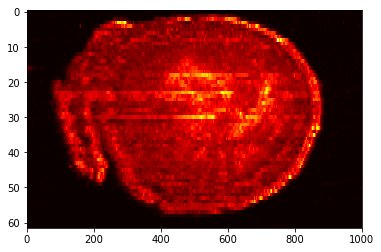

In [2]:
mzArrays = []

#10 hand-picked for Slide6-v2-2 visualization
mzRanges = [
[780.5381, 780.5693],
[784.5698, 784.6012],
[796.5119, 796.5437],
[806.5541, 806.5863],
[808.5691, 808.6015],
[810.5858, 810.6182],
[828.5373, 828.5705],
[830.5530, 830.5862],
[832.5686, 832.6020],
[846.5271, 846.5609]
]
mzArrays.append(mzRanges)


#Set the time resolution to perform interpolation over; def: 0.001
timeRes = 0.001

#Set resultant number of pixels to interp over
numInterpCols = int(1/timeRes)

#Set the number of available CPU threads
num_threads = multiprocessing.cpu_count()-2 #Leave a couple to spare

#For each of the mz sets
for mzRanges in mzArrays:

    #For each of the samples
    dataSampleNames = []
    sortedFolders = natsort.natsorted(glob.glob(dir_InputData +str(len(mzRanges))+'/*'),reverse=False)
    for trainingSampleFolderNum in range(0,len(sortedFolders)):
        trainingSampleFolder = sortedFolders[trainingSampleFolderNum]

        dataSampleName = os.path.basename(trainingSampleFolder)
        print('Sample', dataSampleName)

        resultPath = dir_Results + dataSampleName
        if os.path.exists(resultPath): shutil.rmtree(resultPath)
        os.makedirs(resultPath)    

        dataSampleNames.append(dataSampleName)

        fileNames = natsort.natsorted(glob.glob(trainingSampleFolder + '/*.RAW'),reverse=False)

        result = Parallel(n_jobs=num_threads)(delayed(thermoRAW_spectra)(fileNames[fileNum]) for fileNum in tqdm(range(0,len(fileNames)), desc = 'RAW FILES', leave = True))

        result = np.asarray(result)

        spectraList, indexesList = result[:,0], result[:,1]

        lengths = []
        for x in range(0,len(spectraList)): lengths.append(len(spectraList[x]))
        maximumSpectraLength = max(lengths)

        #Create holding arrays for the visualizations
        mzImages = []
        for mzNum in range(0, len(mzRanges)): mzImages.append([])

        #Perform the visualizations for all of the specified mass ranges
        for rowNum in tqdm(range(0,len(spectraList)), desc = 'ROW', leave = True):
            results = Parallel(n_jobs=num_threads)(delayed(rowVisualizer_parhelper)(mzRanges, maximumSpectraLength, spectraList[rowNum][columnNum].mzValues, spectraList[rowNum][columnNum].signalValues) for columnNum in tqdm(range(0,len(spectraList[rowNum])), desc = 'COL', leave = False))
            results = np.asarray(results).T
            for mzNum in range(0, len(mzRanges)): mzImages[mzNum].append(results[mzNum])
       
        #Extract all unique measurement times for alignment
        allTimes = []
        for rowNum in range(0,len(indexesList)): allTimes.append([scanIndex.time for scanIndex in indexesList[rowNum]])
        uniqueTimes = np.unique([pxNum for row in allTimes for pxNum in row])
        newTimes = np.linspace(min(uniqueTimes), max(uniqueTimes), numInterpCols)

        #For each of the mzImages, interpolate over time-domain for row alignment
        newImages = []
        for mzImage in mzImages:
            newImage = []
            for rowNum in range(0,len(mzImage)):
                origValues = mzImage[rowNum]
                origTimes = [scanIndex.time for scanIndex in indexesList[rowNum]]
                newImage.append(np.interp(newTimes, origTimes, origValues).tolist())
            newImages.append(newImage)

        #Save each of the visualizations
        for mzNum in tqdm(range(0, len(mzRanges)), desc = 'SAVE', leave = True):
            np.savetxt(resultPath + '/mz' + ('%.4f' % mzRanges[mzNum][0]) + '_' + ('%.4f' % mzRanges[mzNum][1]) + 'fn' + dataSampleName + 'ns' + str(len(spectraList)) + '.csv', newImages[mzNum], delimiter=",")
            plt.imshow(np.asarray(newImages[mzNum]), aspect='auto', cmap = 'hot')
            plt.savefig(resultPath + '/mz' + ('%.4f' % mzRanges[mzNum][0]) + '_' + ('%.4f' % mzRanges[mzNum][1]) + 'fn' + dataSampleName + 'ns' + str(len(spectraList)) + '.png')
            plt.close()

        mzWeights = np.ones(len(newImages))/len(newImages)
        avgImage = np.average(np.asarray(newImages), axis=0, weights=mzWeights)
        plt.imshow(avgImage, cmap='hot')
        plt.savefig(resultPath +'/'+ dataSampleName + '_avg_origAspect.png')
        plt.imshow(avgImage,cmap='hot',aspect='auto')
        plt.savefig(resultPath +'/'+ dataSampleName + '_avg_autoAspect.png')

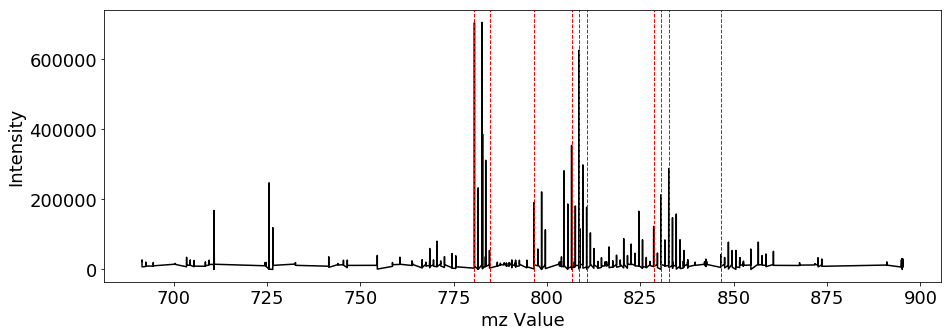

In [48]:

font = {'size' : 18}
plt.rc('font', **font)
f = plt.figure(figsize=(15,5))
plt.plot(spectraList[31][152].mzValues[3500:4500], spectraList[31][152].signalValues[3500:4500], color='k')
[plt.axvline(point, linewidth=1, color='r', linestyle='--') for point in np.mean(np.asarray(mzRanges),axis=1)]
plt.xlabel('mz Value')
plt.ylabel('Intensity')
plt.savefig('Spectrum Plot Example.png')